# Angel Barral Diaz

In [1]:
#We import the modules needed
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#We define each layer efficiency and total events

pA, pB, pC, pD = 0.9, 0.8, 0.7, 0.6

N_events = 10000

In [3]:
#We define the montecarlo

def MC_detection(p, N_events):   
    
    detector = []
    for count in range(N_events):
        
        value=np.random.uniform(0,1,1)
        
        if value<=p:
            detector.append(1)
        elif value>p:
            detector.append(0)
            
    return np.array(detector)

In [4]:
#We get our mc detections

A = MC_detection(pA,N_events)
B = MC_detection(pB,N_events)
C = MC_detection(pC,N_events)
D = MC_detection(pD,N_events)

In [5]:
#We define functions to get the intersection
def intersec3(A,B,C):
    Abool = A==1
    Bbool = B==1
    Cbool = C==1
    
    final=Abool*Bbool*Cbool
    total=sum(final)
    
    return total


def intersec2(A,B):    
    Abool = A==1
    Bbool = B==1
    
    final=Abool*Bbool
    total=sum(final)
    
    return total

In [6]:
#Now we obtain the efficiencies:

effA = intersec3(B,C,A)/intersec2(C,B)

effB = intersec3(A,D,B)/intersec2(A,D)

effC = intersec3(A,D,C)/intersec2(A,D)

effD = intersec3(B,C,D)/intersec2(C,B)

In [7]:
TAG = intersec2(A,D)
PROBE = intersec2(B,C)

s_effA = np.sqrt(PROBE*effA*(1-effA))/PROBE
s_effB = np.sqrt(TAG*effB*(1-effB))/TAG
s_effC = np.sqrt(TAG*effC*(1-effC))/TAG
s_effD = np.sqrt(PROBE*effD*(1-effD))/PROBE


In [8]:
print("===============================================================")
print("The efficiencies for", N_events ,"random events are the following : "); print()
print("Efficiency A:", str(effA)[:6] , " +- " , str(s_effA)[:6])
print("Efficiency B:", str(effB)[:6] , " +- " , str(s_effB)[:6])
print("Efficiency C:", str(effC)[:6] , " +- " , str(s_effC)[:6])
print("Efficiency D:", str(effD)[:6] , " +- " , str(s_effD)[:6]);print()
print("===============================================================")

The efficiencies for 10000 random events are the following : 

Efficiency A: 0.8938  +-  0.0040
Efficiency B: 0.8067  +-  0.0053
Efficiency C: 0.7023  +-  0.0062
Efficiency D: 0.6013  +-  0.0064



In [13]:
#Now we will put all this into a function so we can automatize it and obtain it for multiple number of events

def eff(pA,pB,pC,pD, N_events):
    
    effAT=[]
    effBT=[]
    effCT=[]
    effDT=[]
     
    s_effAT=[]
    s_effBT=[]
    s_effCT=[]
    s_effDT=[]
    
    #We obtain all the parameters for the Nevents range 
    for N in N_events:
        
        A = MC_detection(pA,N)
        B = MC_detection(pB,N)
        C = MC_detection(pC,N)
        D = MC_detection(pD,N)


        effA =intersec3(B,C,A)/intersec2(C,B)
        effB = intersec3(A,D,B)/intersec2(A,D)
        effC = intersec3(A,D,C)/intersec2(A,D)
        effD = intersec3(B,C,D)/intersec2(C,B)
        
        TAG = intersec2(A,D)
        PROBE = intersec2(B,C)

        s_effA = np.sqrt(PROBE*effA*(1-effA))/PROBE
        s_effB = np.sqrt(TAG*effB*(1-effB))/TAG
        s_effC = np.sqrt(TAG*effC*(1-effC))/TAG
        s_effD = np.sqrt(PROBE*effD*(1-effD))/PROBE
        
        effAT.append(effA)
        effBT.append(effB)
        effCT.append(effC)
        effDT.append(effD)
        
        s_effAT.append(s_effA)
        s_effBT.append(s_effB)
        s_effCT.append(s_effC)
        s_effDT.append(s_effD)
        
        #We print the results
        print("===============================================================")
        print("The efficiencies for", N ,"random events are the following : "); print()
        print("Efficiency A:", str(effA)[:6] , " +- " , str(s_effA)[:6])
        print("Efficiency B:", str(effB)[:6] , " +- " , str(s_effB)[:6])
        print("Efficiency C:", str(effC)[:6] , " +- " , str(s_effC)[:6])
        print("Efficiency D:", str(effD)[:6] , " +- " , str(s_effD)[:6]);print()
        print("===============================================================")
        
    
    #Now we will plot the results to see the variation in both quantities
    fig, ax = plt.subplots(1,2, figsize=(12,5))

    ax[1].plot(N_events,effAT,'s--k', ms=7, label='A')
    ax[1].plot(N_events,effBT,'s-r', ms=7, label='B')
    ax[1].plot(N_events,effCT,'sg-', ms=7, label='C')
    ax[1].plot(N_events,effDT,'s-.b', ms=7, label='D')
    ax[1].set_xlabel("Number of events")
    ax[1].set_ylabel("Efficiency")
    ax[1].legend(loc='best')
    ax[0].plot(N_events,s_effAT,'s--k', ms=7, label='A')
    ax[0].plot(N_events,s_effBT,'s-r', ms=7, label='B')
    ax[0].plot(N_events,s_effCT,'sg-', ms=7, label='C')
    ax[0].plot(N_events,s_effDT,'s-.b', ms=7, label='D')
    ax[0].set_xlabel("Number of events")
    ax[0].set_ylabel("Deviation")
    ax[0].set_yscale("log")
    ax[0].legend(loc='best')
    return 

The efficiencies for 100 random events are the following : 

Efficiency A: 0.94  +-  0.0335
Efficiency B: 0.7692  +-  0.0584
Efficiency C: 0.6730  +-  0.0650
Efficiency D: 0.58  +-  0.0697

The efficiencies for 10000 random events are the following : 

Efficiency A: 0.9044  +-  0.0039
Efficiency B: 0.8002  +-  0.0054
Efficiency C: 0.7027  +-  0.0061
Efficiency D: 0.5996  +-  0.0065

The efficiencies for 1000000 random events are the following : 

Efficiency A: 0.8996  +-  0.0004
Efficiency B: 0.7992  +-  0.0005
Efficiency C: 0.6997  +-  0.0006
Efficiency D: 0.5994  +-  0.0006



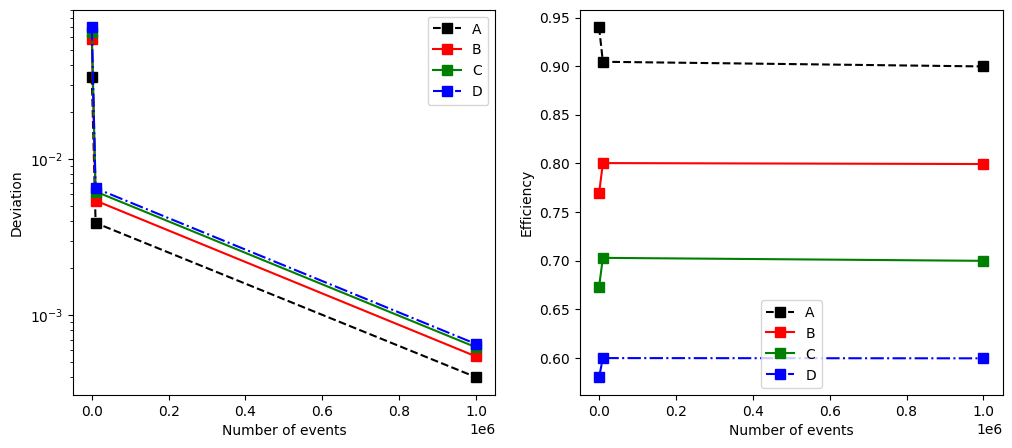

In [16]:
#We finally run the program, more N can be added to the vector
N_events=np.array([100,1e4 ,1e6], dtype=int)
eff(pA,pB,pC,pD, N_events)


## We can note as expected that the more the N, the more precision we have (its mean smaller deviaiton).

## Also we can see that when we increase N from 100 to 10000 we can see the variaiton of this efficiency meanwhile from 10000 till 1000000 it isn't appreciable. Probably because we already have a very good precision so we are near the exact value